<!-- <img src="media/titlepage.png" width="100%"> -->


# Tutorial on Trixi.jl for SNuBIC 2023

### Michael Schlottke-Lakemper, Hendrik Ranocha 

<div style="display:table">
  <div style="display:table-cell; float:right;">
    <img src="figures/blob_with_title.jpg" width="553" height="330" />
  </div>
</div>

[Trixi.jl](https://github.com/trixi-framework/Trixi.jl) is a numerical simulation framework for adaptive, high-order discretizations of conservation laws. It has a modular architecture that allows users to easily extend its functionality and was designed to be useful to experienced researchers and new users alike. In this introduction, we will give an overview of Trixi’s current features, present a typical workflow for creating and running a simulation, and show how to add new capabilities for your own research projects.


## Further information on running this notebook

This introduction is available as a Jupyter notebook at https://github.com/trixi-framework/tutorial-2021-icosahom, including information how to set up everything. For more information about Trixi and how to use it, please visit [Trixi on GitHub](https://github.com/trixi-framework/Trixi.jl) or refer to the [official documentation](https://trixi-framework.github.io/Trixi.jl/stable/). 

This notebook was set up and tested with Julia v1.6.1 but may also work with other (newer) versions.

*Note:* If you change a variable in a later cell and then re-execute an earlier cell, the results might change unexpectedly. Thus if in doubt, re-run the entire notebook *in order*. The reason is that all cells in a Jupyter notebooks share a common variable space.

*Note:* This notebook is tested using Chromium. Most parts should also work for other browsers such as Firefox, but the videos used in the last demonstrations might not be displayed correctly.


## Authors and license

This material is distributed by Michael Schlottke-Lakemper and Hendrik Ranocha under the MIT license. It is inspired by and partially derived from the talks
- [Michael Schlottke-Lakemper (2021), Julia for adaptive high-order multi-physics simulations](https://github.com/trixi-framework/talk-2021-julia-adaptive-multi-physics-simulations)
- [Hendrik Ranocha (2021), Introduction to Julia and Trixi, a numerical simulation framework for hyperbolic PDEs](https://github.com/trixi-framework/talk-2021-Introduction_to_Julia_and_Trixi)
- [Michael Schlottke-Lakemper and Hendrik Ranocha (2021), Adaptive and extendable numerical simulations with Trixi.jl](https://github.com/trixi-framework/talk-2021-juliacon)

In [2]:
# Install all dependencies used in this introduction
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/hackathon/tutorial-2023-snubic`


In [3]:
ENV["COLUMNS"] = 100 # display width

100

In [4]:
# Display mp4 videos used in the demos
using Base64

function display_mp4(filename; relative_width=100, loop=true)
    loop_statement = loop ? " loop" : ""
    display("text/html", string(
    """
        <video autoplay controls width="$(relative_width)%"$(loop_statement)>
            <source src="data:video/x-m4v;base64,""",
            base64encode(open(read,filename)),
        """" type="video/mp4">
        </video>
    """))
end

# Remove the margins when displayed as Jupyter notebook
display(HTML("<style>.container { width:100% !important; }</style>"))

# Alternative display of Youtube videos with fixed weidth/height
# function display_youtube(filename; width=560, height=315)
#     display("text/html", string(
#     """
#         <iframe width="$(width)" height="$(height)" 
#             src="https://www.youtube.com/embed/$(filename)?controls=0&rel=0" 
#             title="YouTube video player" frameborder="0" 
#             allow="accelerometer; autoplay; modestbranding; clipboard-write; encrypted-media; gyroscope; picture-in-picture" 
#             allowfullscreen></iframe>
#     """))
# end

# Responsive display of Youtube videos
display(HTML("<style>.video { position: absolute; top: 0; left: 0; width: 100%; height: 100%; }</style>"))
display(HTML("<style>.videocontainer { position: relative; width: 70%; height: 0; padding-bottom: 56.25%; }</style>"))
function display_youtube(filename)
    display("text/html", string(
    """
        <div class="videocontainer">
        <iframe
            src="https://www.youtube.com/embed/$(filename)?controls=0&rel=0" 
            title="YouTube video player" frameborder="0" 
            allow="accelerometer; autoplay; modestbranding; clipboard-write; encrypted-media; gyroscope; picture-in-picture" 
            allowfullscreen class="video"></iframe>
        </div>
    """))
end

HTML{String}("<style>.container { width:100% !important; }</style>")

HTML{String}("<style>.video { position: absolute; top: 0; left: 0; width: 100%; height: 100%; }</style>")

HTML{String}("<style>.videocontainer { position: relative; width: 70%; height: 0; padding-bottom: 56.25%; }</style>")

display_youtube (generic function with 1 method)

# Trixi.jl: A framework of high-order methods for conservation laws in Julia

<div align="center">
  <img src="figures/main_contributors.jpg" width="80%">
</div>

## Overview of Trixi.jl

<!-- - First code in January 2020
- Version v0.1 on GitHub in [August 2020](https://discourse.julialang.org/t/ann-trixi-jl-a-tree-based-numerical-simulation-framework-for-hyperbolic-pdes/45886)
- Version v0.3 published in [November 2020](https://discourse.julialang.org/t/ann-trixi-jl-v0-3-sciml-integration-and-a-new-modular-approach-for-easy-extension/50419)
- 6 core developers, 12 contributors, 30k+ lines
- 18+ students, 2 published papers
- Integration with Julia ecosphere
  - [OrdinaryDiffEq.jl](https://github.com/SciML/OrdinaryDiffEq.jl): time integration
  - [ForwardDiff.jl](https://github.com/JuliaDiff/ForwardDiff.jl): automatic differentiation
  - [Plots.jl](https://github.com/JuliaPlots/Plots.jl), [Makie.jl](https://github.com/JuliaPlots/Makie.jl): plotting
  - [LoopVectorization.jl](https://github.com/JuliaSIMD/LoopVectorization.jl): performance
  - [Polyester.jl](https://github.com/JuliaSIMD/Polyester.jl): parallelization -->

<div style="display:table">
  <div style="display:table-cell; float:left; vertical-align:top;">
    <ul>
      <li>First code in January 2020</li>
      <li>Version v0.1 on GitHub in <a href="https://discourse.julialang.org/t/ann-trixi-jl-a-tree-based-numerical-simulation-framework-for-hyperbolic-pdes/45886">August 2020</a></li>
        <li>Version v0.3 published in <a href="https://discourse.julialang.org/t/ann-trixi-jl-v0-3-sciml-integration-and-a-new-modular-approach-for-easy-extension/50419">November 2020</a></li>
      <li>6 core developers, 12 contributors, 30k+ lines</li>
      <li>18+ students, 2 published papers</li>
      <li>Integration with Julia ecosphere</li>
      <ul>
        <li><a href="https://github.com/SciML/OrdinaryDiffEq.jl">OrdinaryDiffEq.jl</a>: time integration</li>
        <li><a href="https://github.com/JuliaDiff/ForwardDiff.jl">ForwardDiff.jl</a>: automatic differentiation</li>
        <li><a href="https://github.com/JuliaPlots/Plots.jl">Plots.jl</a>, <a href="https://github.com/JuliaPlots/Makie.jl">Makie.jl</a>: plotting</li>
        <li><a href="https://github.com/JuliaSIMD/LoopVectorization.jl">LoopVectorization.jl</a>: performance</li>
        <li><a href="https://github.com/JuliaSIMD/Polyester.jl">Polyester.jl</a>: parallelization</li>
      </ul>
    </ul>
  </div>
  <div style="display:table-cell; float:right;">
    <img src="figures/trixi_screenshot.png" width="1117" height="920" />
  </div>
</div>

## Acoustic wave scattering on a curved unstructured mesh

In [5]:
display_youtube("2v5KYdK7VLA")

## Kelvin-Helmholtz flow instability with adaptive mesh refinement

In [6]:
display_youtube("JV7NGyVtgLc")

## Purely hyperbolic simulation of a Sedov blast wave with self-gravity

In [7]:
display_youtube("dxgzgteJdOA")

# Solving hyperbolic PDEs with Trixi

Trixi comes with a decent amount of example setups ("elixirs").

In [8]:
using Trixi
default_example() # returns a path to a 2D linear advection setup
readdir(examples_dir())

18-element Vector{String}:
 "README.md"
 "dgmulti_1d"
 "dgmulti_2d"
 "dgmulti_3d"
 "p4est_2d_dgsem"
 "p4est_3d_dgsem"
 "paper_self_gravitating_gas_dynamics"
 "special_elixirs"
 "structured_1d_dgsem"
 "structured_2d_dgsem"
 "structured_3d_dgsem"
 "tree_1d_dgsem"
 "tree_1d_fdsbp"
 "tree_2d_dgsem"
 "tree_2d_fdsbp"
 "tree_3d_dgsem"
 "tree_3d_fdsbp"
 "unstructured_2d_dgsem"

In [9]:
get_examples() |> length

289

## Quickstart

Let's have a look at a simple 2D example.

`trixi_include(...)` is a function that loads a Julia file and executes its contents. We call such files that contain a valid Trixi setup **elixirs**. `default_example()` is part of the Trixi package and returns the path to an example elixir for running a 2D linear advection simulation.

**Please note that during the first invocation this may take a minute or two, since Julia has to compile all functions at first usage.**

In [10]:
using Trixi
trixi_include(default_example())

[ Info: You just called `trixi_include`. Julia may now compile the code, please be patient.



████████╗██████╗ ██╗██╗  ██╗██╗
╚══██╔══╝██╔══██╗██║╚██╗██╔╝██║
   ██║   ██████╔╝██║ ╚███╔╝ ██║
   ██║   ██╔══██╗██║ ██╔██╗ ██║
   ██║   ██║  ██║██║██╔╝ ██╗██║
   ╚═╝   ╚═╝  ╚═╝╚═╝╚═╝  ╚═╝╚═╝

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ SemidiscretizationHyperbolic                                                                     │
│ ════════════════════════════                                                                     │
│ #spatial dimensions: ………………………… 2                                                                │
│ mesh: ………………………………………………………………… TreeMesh{2, Trixi.SerialTree{2}} with length 341                 │
│ equations: …………………………………………………… LinearScalarAdvectionEquation2D                                  │
│ initial condition: ……………………………… initial_condition_convergence_test                               │
│ boundary conditions: ………………………… Trixi.BoundaryConditionPeriodic                                  

The results of a Trixi simulation can easily be visualized with the [Plots](https://github.com/JuliaPlots/Plots.jl) package. Simply load `Plots` and call the `plot(...)` command with the argument `sol`. By convention, in all our elixirs `sol` (short for *solution*) is the variable name that contains the result of a simulation.

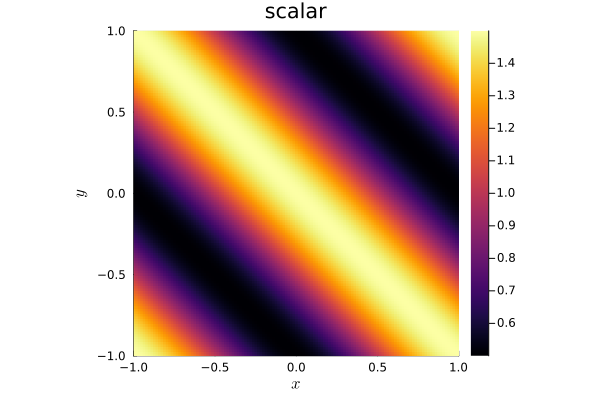

In [11]:
using Plots
plot(sol)

# Mixing an elixir: creating a Trixi simulation from scratch

Let's have a look at what an elixir looks like. Generally speaking, the following components are required:
- `equations` contain all physics-specific data and functionality
- a `solver` represents the numerical method and its algorithms
- a `mesh` holds the grid data
- a `semidiscretization` encapsulates `equation`, `solver`, and `mesh`, together with initial and boundary conditions

The semidiscretization object is then used to create an `ODEProblem` that can be solved with one of the solvers for ordinary differential equations (ODEs) from the [OrdinaryDiffEq](https://github.com/SciML/OrdinaryDiffEq.jl) package.

<div align="center">
  <img src="https://github.com/trixi-framework/talk-2021-Introduction_to_Julia_and_Trixi/raw/main/media/components.png" width="80%" />
</div>

In the following are the contents of a *minimum* elixir that produces the same result as the `trixi_include(...)` command above (the elixir can be found in [examples/elixir_advection_simple.jl](examples/elixir_advection_simple.jl)):

In [12]:
using OrdinaryDiffEq, Trixi

In [13]:
advectionvelocity = (1.0, 1.0)
equations = LinearScalarAdvectionEquation2D(advectionvelocity)

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ LinearScalarAdvectionEquation2D                                                                  │
│ ═══════════════════════════════                                                                  │
│ #variables: ………………………………………………… 1                                                                │
│ │ variable 1: …………………………………………… scalar                                                           │
└──────────────────────────────────────────────────────────────────────────────────────────────────┘

In [14]:
solver = DGSEM(polydeg=3, surface_flux=flux_lax_friedrichs)

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ DG{Float64}                                                                                      │
│ ═══════════                                                                                      │
│ basis: ……………………………………………………………… LobattoLegendreBasis{Float64}(polydeg=3)                         │
│ mortar: …………………………………………………………… LobattoLegendreMortarL2{Float64}(polydeg=3)                      │
│ surface integral: ………………………………… SurfaceIntegralWeakForm                                          │
│ │ surface flux: ……………………………………… FluxLaxFriedrichs(max_abs_speed_naive)                           │
│ volume integral: …………………………………… VolumeIntegralWeakForm                                           │
└──────────────────────────────────────────────────────────────────────────────────────────────────┘

In [15]:
# Create a uniformely refined mesh with periodic boundaries
coordinates_min = (-1.0, -1.0) # lower left corner of the square
coordinates_max = ( 1.0,  1.0) # upper right corner of the square
mesh_static = TreeMesh(coordinates_min, coordinates_max,
                       initial_refinement_level=4, n_cells_max=10^5)

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ TreeMesh{2, Trixi.SerialTree{2}}                                                                 │
│ ════════════════════════════════                                                                 │
│ center: …………………………………………………………… [0.0, 0.0]                                                       │
│ length: …………………………………………………………… 2.0                                                              │
│ periodicity: ……………………………………………… (true, true)                                                     │
│ current #cells: ……………………………………… 341                                                              │
│ maximum #cells: ……………………………………… 100000                                                           │
└──────────────────────────────────────────────────────────────────────────────────────────────────┘

In [16]:
# Create semidiscretization with all spatial discretization-related components
semi = SemidiscretizationHyperbolic(mesh_static, equations,
                                    initial_condition_convergence_test,
                                    solver)

# Create ODE problem from semidiscretization with time span from 0.0 to 1.0
ode = semidiscretize(semi, (0.0, 1.0));

# Evolve ODE problem in time using `solve` from OrdinaryDiffEq
@time sol = solve(ode, BS3(), save_everystep=false);

  3.576157 seconds (10.62 M allocations: 657.557 MiB, 1.44% gc time, 99.80% compilation time: 49% of which was recompilation)


And that's it. In this minimum example, there is no output to the terminal/notebook, thus only the lack of errors tells us that everything went smoothly. However, as before, we can visualize the solution by plotting it with the `plot` function of the `Plots` package:

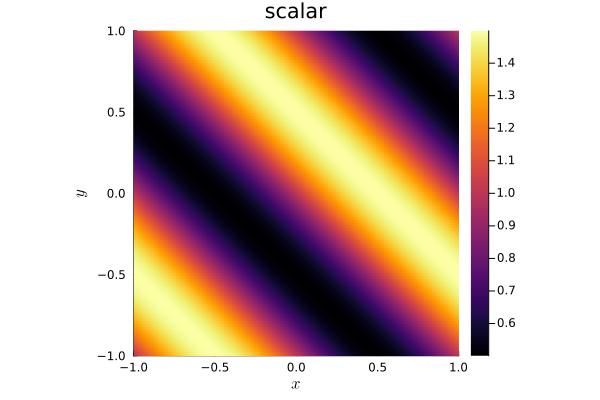

In [17]:
using Plots
plot(sol)

As you can see from the snippet above, the entirety of a simulation setup is defined in pure Julia: There are no "special" parameter files, and changing a simulation setup means to modify its elixir. For example, we can change the advection speeds by passing a different velocity vector to `LinearScalarAdvectionEquation2D`,

```julia
# Create equations with different advection velocity
advectionvelocity = (1.0, 0.1)
equations = LinearScalarAdvectionEquation2D(advectionvelocity)
```

and re-run the simulation by re-creating the semidiscretization and the `ODEProblem`, and then calling `solve(...)` again.

## Using a different initial condition

So far we have only used functionality that is provided by Trixi. With its modular architecture, however, it is easy to extend Trixi with your own features. Let's define a new initial condition with a cosine-shaped pulse at its center:

In [18]:
using LinearAlgebra # for `norm`

function cosine_pulse(x, t, equations::LinearScalarAdvectionEquation2D)
  halfwidth = 0.5
  radius = norm(x)

  if radius > halfwidth
    u = 0.0
  else
    u = 0.1 + 0.1 * cospi(radius / halfwidth)
  end

  return SVector(u)
end

cosine_pulse (generic function with 1 method)

Now we can use this function for the initial condition parameter in the semidiscretization, re-run the simulation, and plot the results:

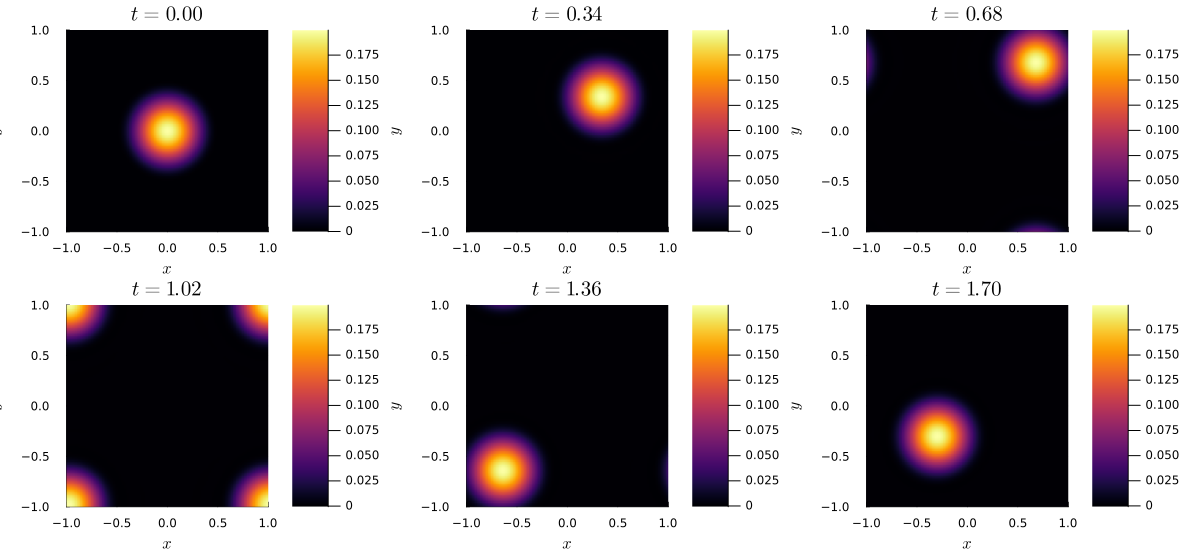

In [19]:
# Recreate semidiscretization with the new initial condition
semi = SemidiscretizationHyperbolic(mesh_static, equations,
                                    cosine_pulse, # <-- here is the new initialization function
                                    solver)
# Create and solve ODE problem
ode = semidiscretize(semi, (0.0, 1.7));
sol = solve(ode, BS3(), saveat=range(ode.tspan..., length=6));

using Printf
plot(map(i -> plot(sol.u[i], semi, title=@sprintf("\$ t = %.2f \$", sol.t[i])), 
        eachindex(sol.t))..., size=(1200, 550))

## Adaptive mesh refinement

In the previous examples, we have always used a static, uniform mesh. This means we did not fully exploit one of Trixi's fundamental building blocks: the underlying hierarchical Cartesian mesh. With its ability to locally refine the mesh in a solution-adaptive way, it can be used to greatly speed up simulations with no or minimal loss in overall accuracy. The following image series of the grid for an expanding blast wave simulation ([elixir](examples/elixir_euler_blast_wave_amr.jl) available in this repository) at $t = [0.2, 0.6, 1.0]$ (left to right) illustrates how the mesh resolution is increased only where needed.

<div align="center">
  <img src="https://github.com/trixi-framework/talk-2021-Introduction_to_Julia_and_Trixi/raw/main/media/callbacks_AMR.png" width="80%" />
</div>

With Trixi, you can statically refine the mesh upfront, adaptively refine it during a simulation, or use a combination of both. Here, we will focus on how to do adaptive mesh refinement (AMR), which is implemented in Trixi as a **step callback**. A callback is an algorithmic entity that is registered with the ODE solver and then *called* in regular intervals to perform certain tasks: *step* callbacks are run after each time step, while *stage* callbacks are run after each stage of the ODE solver.

Using callbacks instead of hard-coding all features in the main loop has the advantage that it allows to extend Trixi with new functionality without having to modify its code directly. Beyond AMR, we make use of callbacks also for tasks such as solution analysis, file I/O, in-situ visualization, or time step size calculation.

Building upon the previous example, we will now introduce the `AMRCallback` to adaptively refine the mesh around the cosine pulse every 5 steps. The callback also requires the definition of an *AMR controller*, i.e., an object that tells the AMR algorithms which cells to refine/coarsen:

In [20]:
# Use a simple AMR controller to refine cells between level 4 and level 6,
# based on the maximum value of the solution in an element
amr_controller = ControllerThreeLevel(semi,
                                      IndicatorMax(semi, variable=first),
                                      base_level=4,
                                       med_level=5, med_threshold=0.05,
                                       max_level=6, max_threshold=0.15);

# Create the AMR callback that will be called every 5 time steps
amr_callback = AMRCallback(semi, amr_controller, interval=5)

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ AMRCallback                                                                                      │
│ ═══════════                                                                                      │
│ controller: ………………………………………………… ControllerThreeLevel                                             │
│ │ indicator: ……………………………………………… IndicatorMax                                                     │
│ │ │ indicator variable: ………………… first                                                            │
│ │ base_level: …………………………………………… 4                                                                │
│ │ med_level: ……………………………………………… 5                                                                │
│ │ max_level: ……………………………………………… 6                                                                │
│ │ med_threshold: …………………………………… 0.05                                                     

The `AMRCallback` can now be passed to the ODE solver and will be invoked (i.e., performs adaptive mesh refinement) every 5 time steps. Note that we also create a new mesh with a lower initial refinement, since by default the `AMRCallback` will iteratively refine the initial mesh based on the AMR controller until it does not change anymore.

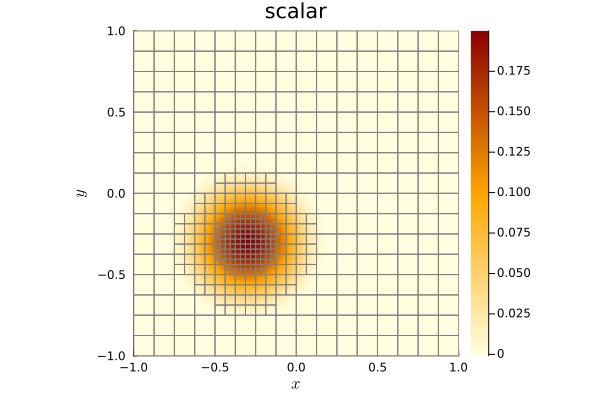

In [21]:
# Create new mesh and semidiscretization with lower initial refinement level
mesh_amr = TreeMesh(coordinates_min, coordinates_max,
                    initial_refinement_level=2,
                    n_cells_max=10^5)
semi = SemidiscretizationHyperbolic(mesh_amr, equations,
                                    cosine_pulse,
                                    solver)

# Create and solve ODE problem, using the previously constructed AMR callback
ode = semidiscretize(semi, (0.0, 1.7));
sol = solve(ode, BS3(), save_everystep=false, callback=amr_callback);

# Plot result
pd = PlotData2D(sol)
plot(pd, seriescolor=:heat)
plot!(getmesh(pd))

Here we also changed the color scheme and added the mesh lines to the plot to demonstrate how the mesh is locally refined around the cosine pulse. To find out more about how to visualize solutions with the `Plots` package, please refer to the [Trixi documentation](https://trixi-framework.github.io/Trixi.jl/stable/visualization/#Plots.jl).

# Advanced usage

In the following, we will introduce some of the more advanced features in Trixi (advanced in the sense that they go beyond basic functionality, not that they are particularly complicated to use).

## Visualizing the spectrum

Trixi contains a method `linear_structure` that wraps the right-hand side operator of a semidiscretization as a linear operator. This can then be used to plot the spectrum for, e.g., the discretization of the scalar advection equation:

[ Info: You just called `trixi_include`. Julia may now compile the code, please be patient.


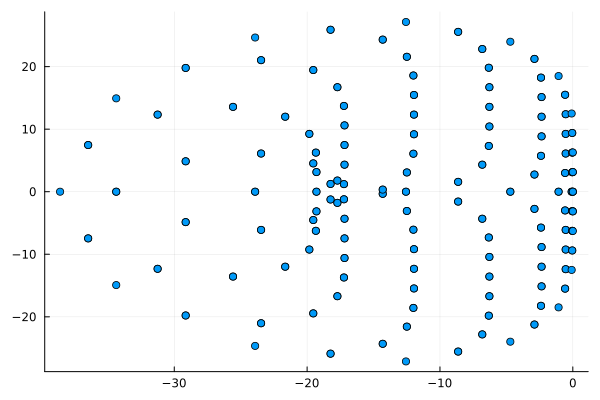

In [22]:
# Include an elixir to quickly obtain an appropriate semi discretization
trixi_include(joinpath("examples", "elixir_advection_simple.jl"), initial_refinement_level=2)

# Get linear operator
A, b = linear_structure(semi)

# Compute eigenvalues
using LinearAlgebra
λ = eigvals(Matrix(A))

# Plot eigenvalues in complex plane
plot(real(λ), imag(λ), seriestype=:scatter, legend=nothing)

Similarly, to analyse the spectrum of non-linear operators we can use `jacobian_ad_forward`, which uses sforward mode automatic differentiation to compute the Jacobian `J` of the operator. Here we use the elixir [examples/elixir_euler_simple.jl](examples/elixir_euler_simple.jl), which is a simplified version of an elixir for the compressible Euler equations that also comes packaged with Trixi:

[ Info: You just called `trixi_include`. Julia may now compile the code, please be patient.


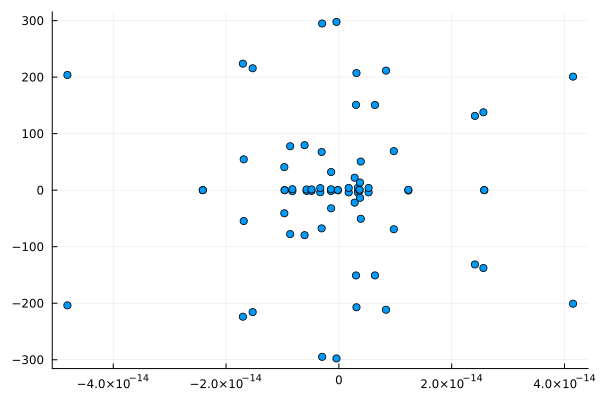

In [23]:
# Include an elixir to quickly obtain an appropriate semidiscretization
trixi_include(joinpath("examples", "elixir_euler_simple.jl"))

# Determine Jacobian
J = jacobian_ad_forward(semi)

# Compute eigenvalues
λ = eigvals(J)

# Plot eigenvalues in complex plane
plot(real(λ), imag(λ), seriestype=:scatter, legend=nothing)

## Propagating errors using Measurements.jl

Similar to AD, Trixi also allows propagating uncertainties using linear error propagation theory via Measurements.jl. As an example, let's create a system representing the linear advection equation in 1D with an uncertain velocity. Then, we create a semidiscretization using a sine wave as initial condition, solve the ODE, and plot the resulting uncertainties in the primitive variables.

In [24]:
using Trixi, OrdinaryDiffEq, Measurements, Plots

advectionvelocity = 1.0 ± 0.1
equations = LinearScalarAdvectionEquation1D(advectionvelocity)
typeof(advectionvelocity)

Measurement{Float64}

┌ Warning: #= /Users/hpcschlo/.julia/packages/Trixi/WX5W2/src/solvers/dgsem/interpolation.jl:129 =#:
│ `LoopVectorization.check_args` on your inputs failed; running fallback `@inbounds @fastmath` loop instead.
│ Use `warn_check_args=false`, e.g. `@turbo warn_check_args=false ...`, to disable this warning.
└ @ Trixi ~/.julia/packages/LoopVectorization/MKW82/src/condense_loopset.jl:1063


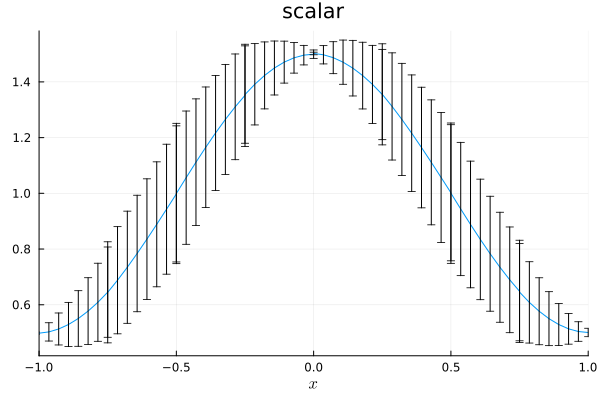

In [25]:
mesh = TreeMesh((-1.0,), (1.0,), n_cells_max=10^5, initial_refinement_level=3)
solver = DGSEM(polydeg=3)
semi = SemidiscretizationHyperbolic(mesh, equations, initial_condition_convergence_test,
                                    solver, uEltype=Measurement{Float64})
ode = semidiscretize(semi, (0.0, 1.5))
sol = solve(ode, BS3(), save_everystep=false)
plot(sol)

## Differentiating through a complete simulation

More details can be found in the [documentation of Trixi](https://trixi-framework.github.io/Trixi.jl).

In [38]:
using ForwardDiff

function energy_at_final_time(k) # k is the wave number of the initial condition
   equations = LinearScalarAdvectionEquation2D(1.0, -0.3)
   mesh = TreeMesh((-1.0, -1.0), (1.0, 1.0), initial_refinement_level=3, n_cells_max=10^4)
   solver = DGSEM(polydeg=3, surface_flux=flux_lax_friedrichs)
   initial_condition = (x, t, equation) -> begin
       x_trans = Trixi.x_trans_periodic_2d(x - equation.advection_velocity * t)
       return SVector(sinpi(k * sum(x_trans)))
   end
   semi = SemidiscretizationHyperbolic(mesh, equations, initial_condition, solver,
                                       uEltype=typeof(k))
   ode = semidiscretize(semi, (0.0, 1.0))
   sol = solve(ode, BS3(), save_everystep=false)
   Trixi.integrate(energy_total, sol.u[end], semi)
end

k_values = range(0.9, 1.1, length=101)

0.9:0.002:1.1

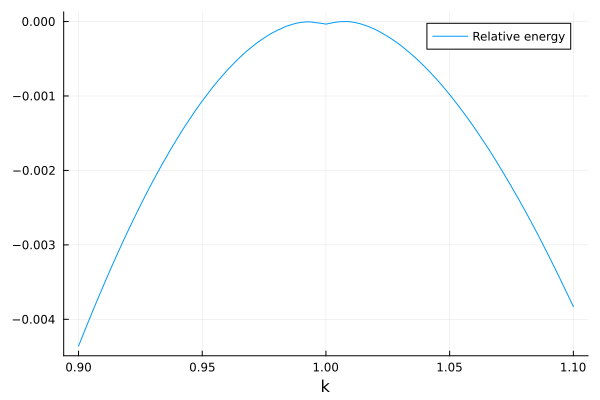

In [39]:
energy_values = energy_at_final_time.(k_values)
plot(k_values, energy_values .- maximum(energy_values),
     xguide="k", label="Relative energy")

You should see a plot of a curve that resembles a parabola with local maximum around `k = 1.0`. Why's that? Well, the domain is fixed but the wave number changes. Thus, if the wave number is not chosen as an integer, the initial condition will not be a smooth periodic function in the given domain. Hence, the dissipative surface flux (`flux_lax_friedrichs` in this example) will introduce more dissipation. In particular, it will introduce more dissipation for "less smooth" initial data, corresponding to wave numbers `k` further away from integers.

We can compute the discrete derivative of the energy at the final time with respect to the wave number `k` as follows.

In [40]:
ForwardDiff.derivative(energy_at_final_time, 1.0)

1.4246449808106193e-5

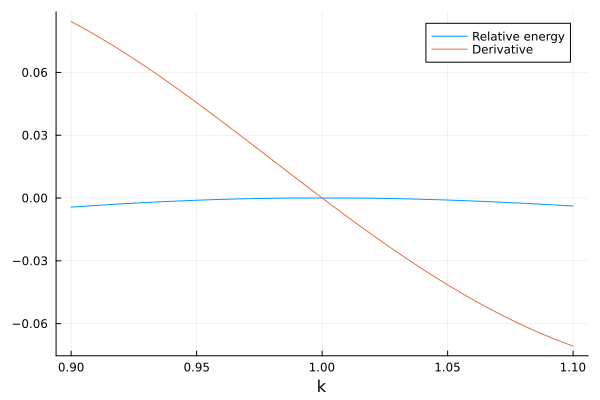

In [41]:
dk_values = ForwardDiff.derivative.((energy_at_final_time,), k_values);
plot!(k_values, dk_values, label="Derivative")

## Analyzing the solution

Oftentimes it is desireable to analyze a running simulation quantitatively by calculating integral quantities on the fly, which can be achieved by creating an `AnalysisCallback`. By default, it computes the $L^2$ and $L^\infty$ errors and prints it to the terminal (we have seen an example of this in the [introduction]((#Solving-hyperbolic-PDEs-with-Trixi)) section above). This can be extended to other built-in or user-provided integral quantities, such as the entropy time derivative $\partial S/\partial u \cdot \partial u/\partial t$, the conservation error, or the total kinetic energy.

In the following, we will create and `AnalysisCallback` that performs a solution analysis every 20 time steps, additionally computes the conservation error, and saves everything to a file (in addition to showing it on the terminal):

In [42]:
# Create semidiscretization with a fully periodic initial condition
equations = LinearScalarAdvectionEquation2D((1.0, 1.0))
semi = SemidiscretizationHyperbolic(mesh_static, equations, initial_condition_convergence_test, solver)

analysis_callback = AnalysisCallback(semi, interval=20,
                                     extra_analysis_errors=(:conservation_error,));

Since the $L^2$ and $L^\infty$ errors are computed with respect to the (time-resolved) initial condition function, we will again use the  fully periodic`initial_condition_convergence_test` to initialize the solution. We will also use a static mesh again.

In [43]:
# Create and solve ODE problem
ode = semidiscretize(semi, (0.0, 1.0));
sol = solve(ode, BS3(), save_everystep=false, callback=analysis_callback);


────────────────────────────────────────────────────────────────────────────────────────────────────
 Simulation running 'LinearScalarAdvectionEquation2D' with DGSEM(polydeg=3)
────────────────────────────────────────────────────────────────────────────────────────────────────
 #timesteps:                  0                run time:       6.08400000e-06 s
 Δt:             0.00000000e+00                └── GC time:    0.00000000e+00 s (0.000%)
 sim. time:      0.00000000e+00                time/DOF/rhs!:         NaN s
 #DOF:                      256                alloc'd memory:       1528.219 MiB
 #elements:                  16

 Variable:       scalar        
 L2 error:       9.84806693e-04
 Linf error:     3.08873030e-03
 |∑U - ∑U₀|:     0.00000000e+00
 ∑∂S/∂U ⋅ Uₜ :  -5.02419287e-16
────────────────────────────────────────────────────────────────────────────────────────────────────


──────────────────────────────────────────────────────────────────────────────────────────────────

## Running convergence tests

When developing new numerical methods, a common part of the workflow is the check if the implemented scheme still exhibits the expected order of convergence (EOC) for mesh refinement. Trixi has a helper function `convergence_test(...)`, which re-runs a given elixir multiple times, each time increasing the mesh resolution by one. For this, we will again use the default example elixir provided by Trixi.

*Note:* Since changing the mesh resolution also affects the allowed time step through the CFL condition, `convergence_test(...)` requires the elixir to use a [StepsizeCallback](https://trixi-framework.github.io/Trixi.jl/stable/reference-trixi/#Trixi.StepsizeCallback) to automatically compute the explicit time step or use error-based step size control with appropriately small tolerances.

In [44]:
# Run convergence test with default example and 3 different mesh refinement levels
convergence_test(default_example(), 3);

Running convtest iteration 1/3

████████╗██████╗ ██╗██╗  ██╗██╗
╚══██╔══╝██╔══██╗██║╚██╗██╔╝██║
   ██║   ██████╔╝██║ ╚███╔╝ ██║
   ██║   ██╔══██╗██║ ██╔██╗ ██║
   ██║   ██║  ██║██║██╔╝ ██╗██║
   ╚═╝   ╚═╝  ╚═╝╚═╝╚═╝  ╚═╝╚═╝

┌──────────────────────────────────────────────────────────────────────────────────────────────────┐
│ SemidiscretizationHyperbolic                                                                     │
│ ════════════════════════════                                                                     │
│ #spatial dimensions: ………………………… 2                                                                │
│ mesh: ………………………………………………………………… TreeMesh{2, Trixi.SerialTree{2}} with length 341                 │
│ equations: …………………………………………………… LinearScalarAdvectionEquation2D                                  │
│ initial condition: ……………………………… initial_condition_convergence_test                               │
│ boundary conditions: ………………………… Trixi.BoundaryConditionPeriodic   

[ Info: You just called `trixi_include`. Julia may now compile the code, please be patient.
[ Info: You just called `trixi_include`. Julia may now compile the code, please be patient.
[ Info: You just called `trixi_include`. Julia may now compile the code, please be patient.



────────────────────────────────────────────────────────────────────────────────────────────────────
 Simulation running 'LinearScalarAdvectionEquation2D' with DGSEM(polydeg=3)
────────────────────────────────────────────────────────────────────────────────────────────────────
 #timesteps:                 72                run time:       2.14921041e-01 s
 Δt:             1.38888889e-02                └── GC time:    0.00000000e+00 s (0.000%)
 sim. time:      1.00000000e+00                time/DOF/rhs!:  8.01888532e-09 s
 #DOF:                    65536                alloc'd memory:       1550.420 MiB
 #elements:                4096

 Variable:       scalar        
 L2 error:       3.08380815e-08
 Linf error:     2.57436012e-07
 ∑∂S/∂U ⋅ Uₜ :  -1.16170153e-13
────────────────────────────────────────────────────────────────────────────────────────────────────

 ────────────────────────────────────────────────────────────────────────────────
            Trixi.jl                    Time 

## Postprocessing with Trixi2Vtk and ParaView

So far we have only visualized the solutions ad-hoc using the `plots(...)` function of the `Plots` package. However, for a more in-depth solution analysis especially of 3D data, it is often helpful to rely on a proper visualization program. Trixi supports converting its solution files, which are created as HDF5 files by the [SaveSolutionCallback](https://trixi-framework.github.io/Trixi.jl/stable/reference-trixi/#Trixi.SaveSolutionCallback)), to VTK files that can be opened and visualized with [ParaView](https://www.paraview.org) or [VisIt](http://visit.llnl.gov). This functionality is available in the [Trixi2Vtk](https://github.com/trixi-framework/Trixi2Vtk.jl) package, which provides a `trixi2vtk(...)` function:

In [45]:
using Trixi2Vtk
trixi2vtk(joinpath("out", "solution_000000.h5"), output_directory="out")

 ────────────────────────────────────────────────────────────────────────────────
                                        Time                    Allocations      
                               ───────────────────────   ────────────────────────
       Tot / % measured:            932ms /  99.9%            335MiB /  99.9%    

 Section               ncalls     time    %tot     avg     alloc    %tot      avg
 ────────────────────────────────────────────────────────────────────────────────
 build VTK grid (no...      1    756ms   81.3%   756ms    243MiB   72.6%   243MiB
 prepare VTK cells ...      1    130ms   13.9%   130ms   79.7MiB   23.8%  79.7MiB
 add data to VTK file       1   16.0ms    1.7%  16.0ms    284KiB    0.1%   284KiB
   scalar                   1   11.8ms    1.3%  11.8ms   35.4KiB    0.0%  35.4KiB
   add data to VTK ...      1   4.15ms    0.4%  4.15ms    247KiB    0.1%   247KiB
     cell_ids               1   2.02ms    0.2%  2.02ms   35.3KiB    0.0%  35.3KiB
     element_id

This will create two files in the `out` directory, `solution_000000.vtu` and `solution_000000_celldata.vtu`. More information about how to use `trixi2vtk(...)` can be found in the [Trixi documentation](https://trixi-framework.github.io/Trixi.jl/stable/visualization/#Trixi2Vtk).